In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('historic.csv')
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [4]:
df.isnull().value_counts()

item_no  category  main_promotion  color  stars  success_indicator
False    False     False           False  False  False                8000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [6]:
df.duplicated().value_counts()

False    8000
dtype: int64

 **Doing Analysis for cloumn item_no**

In [8]:
df['item_no'].describe()

count      8000.000000
mean     546474.338375
std      256513.463874
min      100171.000000
25%      325001.500000
50%      547081.000000
75%      764312.250000
max      989740.000000
Name: item_no, dtype: float64

In [9]:
df = df[['category','main_promotion','color','stars','success_indicator']]

In [10]:
df.head()

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top


**Doing Analysis for cloumn category**

In [11]:
df['category'].value_counts()


Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le1 = LabelEncoder()
encoded_category1 = le1.fit_transform(df['category'])
print(encoded_category1)

[5 1 3 ... 4 0 3]


In [13]:
df['category'] = encoded_category1   # converting category in text to numbers / encoded once

In [14]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [15]:
encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1)) # dictionary mapping the names to the numerical values
for category1, value1 in category_mapping1.items():
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")  # encoded value with its original name

Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5


In [23]:
pd.crosstab(df['category'], df['success_indicator'])

success_indicator,flop,top
category,,
0,363,883
1,258,481
2,817,729
3,453,907
4,271,1188
5,653,997


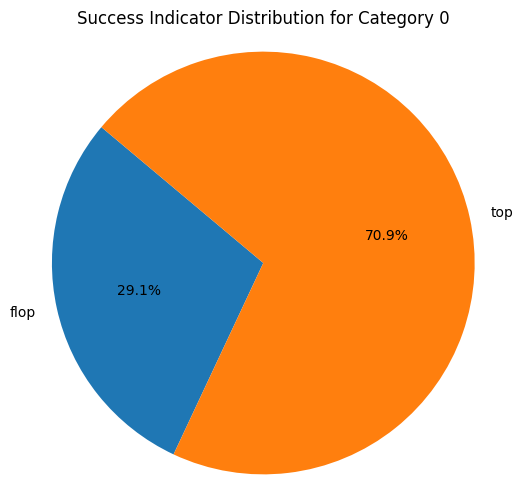

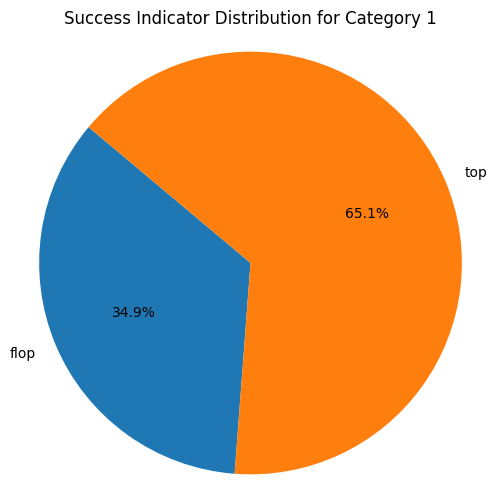

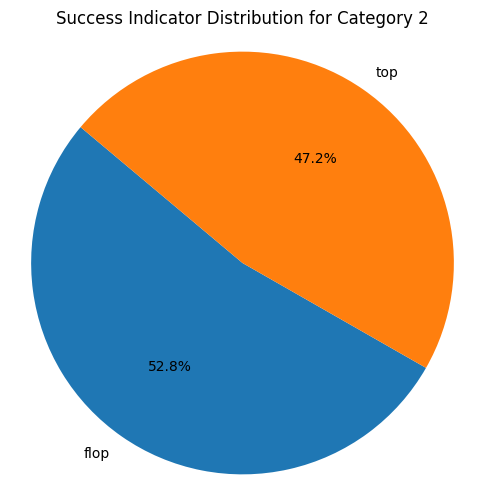

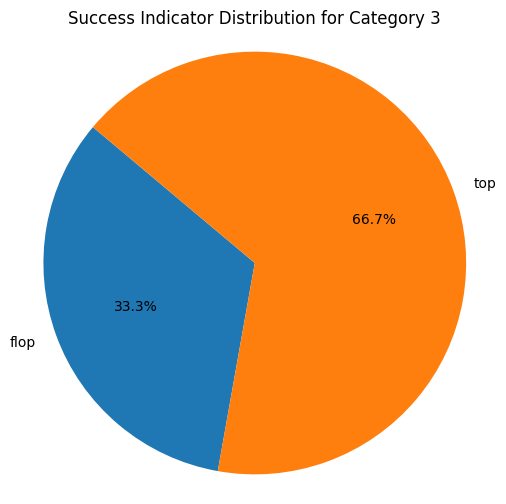

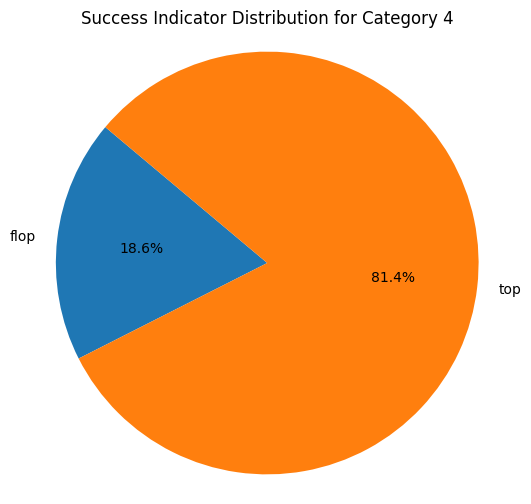

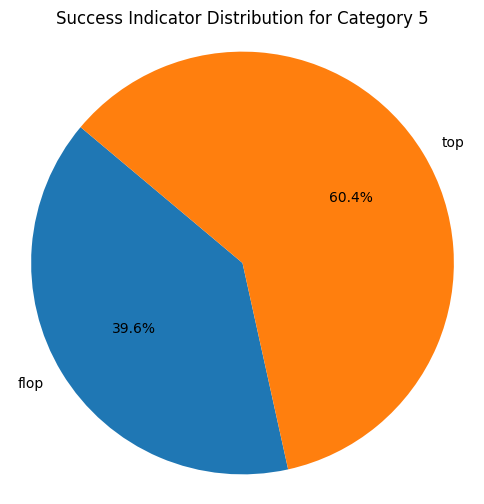

In [24]:
comparison = pd.crosstab(df['category'], df['success_indicator'])

for category in comparison.index:
    plt.figure(figsize=(6, 6))
    plt.pie(comparison.loc[category], labels=comparison.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Success Indicator Distribution for Category {category}')
    plt.axis('equal')
    plt.show()

In [21]:
df[df['category'] == 0].shape # 1246
df[(df['category'] ==  0 ) & (df['success_indicator'] == 1)].shape #883


(0, 5)

In [25]:
df[df['category'] == 3].shape # 1360
df[(df['category'] ==  3 ) & (df['success_indicator'] == 1)].shape #907

(0, 5)

**Analysis on main_promotion **

In [26]:
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
lbl_en_2 = LabelEncoder()
encd_main_promotion = lbl_en_2.fit_transform(df['main_promotion'])
print(encd_main_promotion)

[0 1 0 ... 1 1 2]


In [31]:
df['main_promotion'] = encd_main_promotion
encoded_categories_mp = lbl_en_2.classes_
encoded_categories_mp


array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [34]:
encoded_values_2 = lbl_en_2.transform(encoded_categories_mp)
category_mapping_2 = dict(zip(encoded_categories_mp, encoded_values_2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping_2.items(): 0.837812
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [38]:
pd.crosstab(df['main_promotion'], df['success_indicator'])


success_indicator,flop,top
main_promotion,,
0,953,1293
1,930,1502
2,335,974
3,597,1416


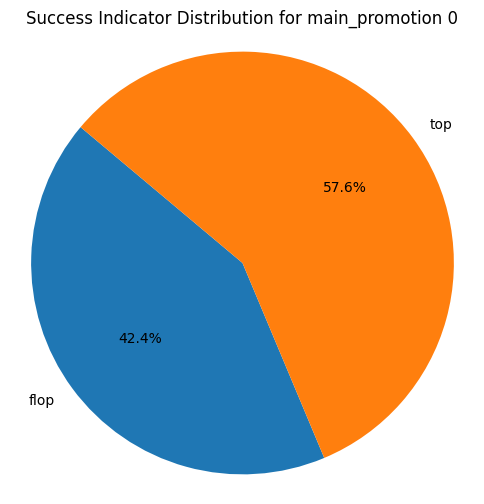

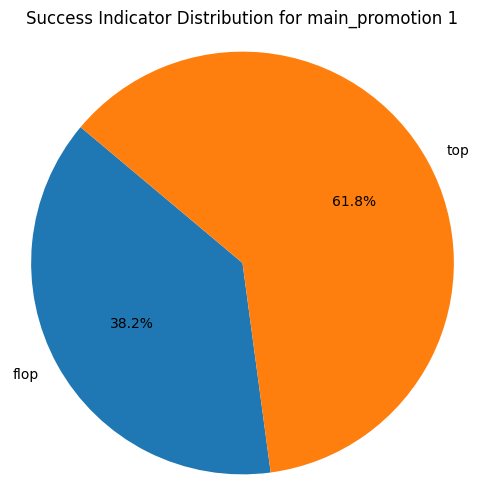

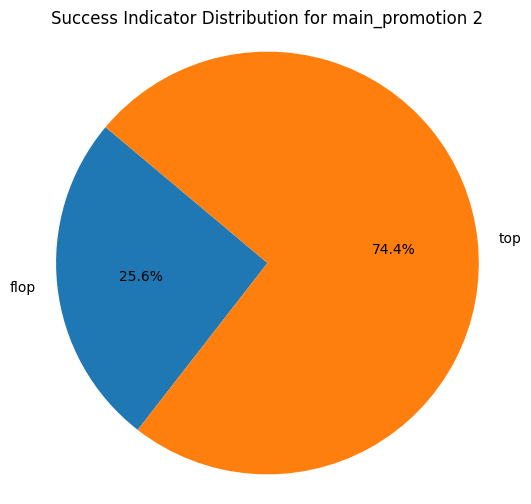

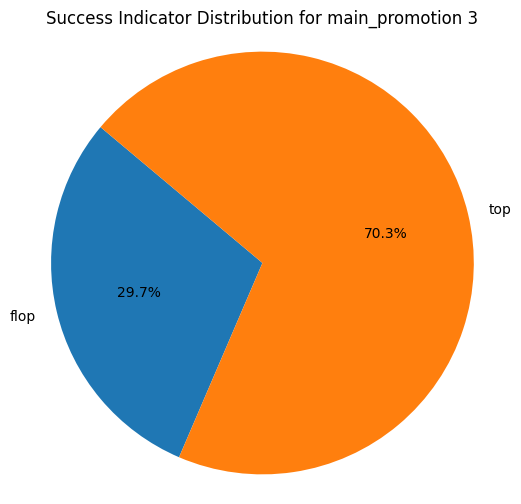

In [40]:
comaprison_2 = pd.crosstab(df['main_promotion'], df['success_indicator'])

for main_promotion in comaprison_2.index:
    plt.figure(figsize=(6, 6))
    plt.pie(comaprison_2.loc[main_promotion], labels=comaprison_2.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Success Indicator Distribution for main_promotion {main_promotion}')
    plt.axis('equal')
    plt.show()

In [41]:
df[df['main_promotion'] == 0].shape

(2246, 5)

In [55]:
df[df['main_promotion'] == 1].shape # 2432
df[(df['main_promotion'] ==  1 ) & (df['success_indicator'] == 1)].shape #1502

(0, 5)

Analysis on : color feature

In [76]:


df['color'].value_counts()

from sklearn.preprocessing import LabelEncoder    # here we have encoded color category into num using label encoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(df['color'])
print(encoded_color)

df['color'] = encoded_color
encoded_color_class = le3.classes_
encoded_color_class

encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3)) # dictionary mapping the names to the numerical values
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")  # encoded value with its original name

df.head()



[3 7 7 ... 9 1 1]
Encoded Category: 0, Encoded Value: 0
Encoded Category: 1, Encoded Value: 1
Encoded Category: 2, Encoded Value: 2
Encoded Category: 3, Encoded Value: 3
Encoded Category: 4, Encoded Value: 4
Encoded Category: 5, Encoded Value: 5
Encoded Category: 6, Encoded Value: 6
Encoded Category: 7, Encoded Value: 7
Encoded Category: 8, Encoded Value: 8
Encoded Category: 9, Encoded Value: 9


,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.1,0
1,1,1,7,1.5,0
2,3,0,7,4.4,1
3,2,1,1,3.1,0
4,1,1,3,4.1,1


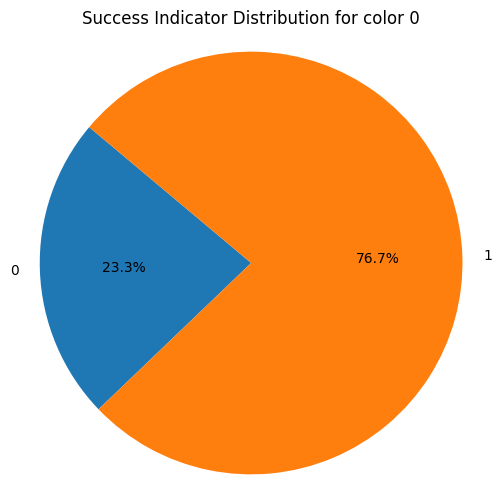

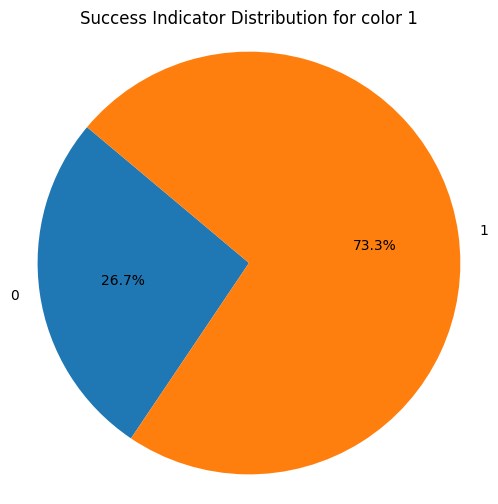

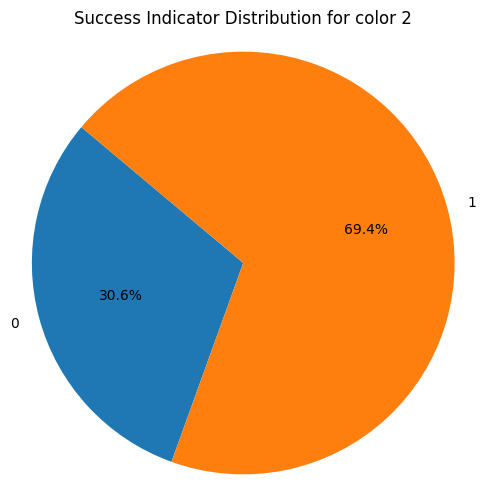

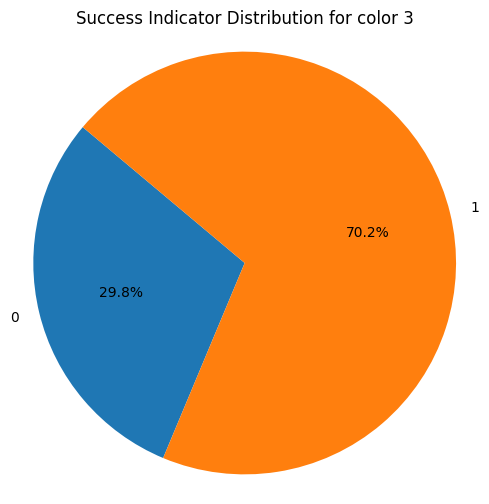

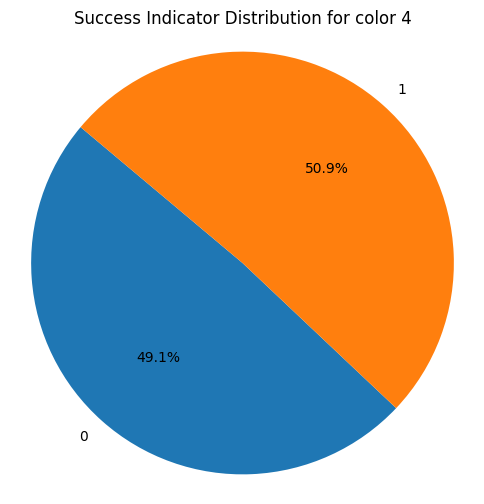

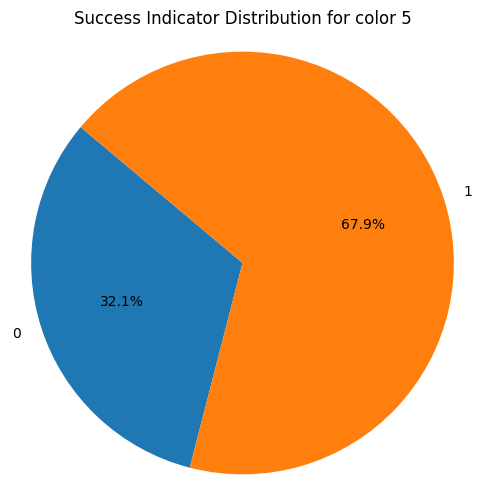

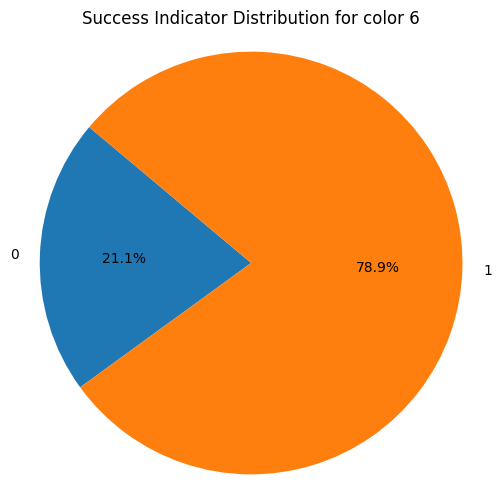

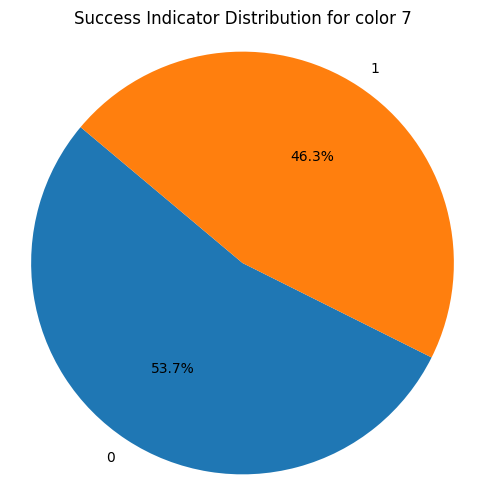

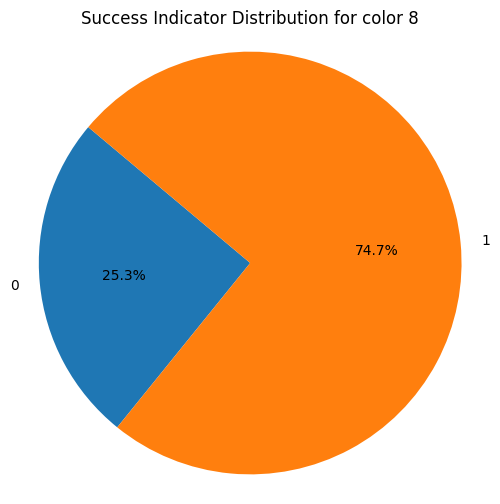

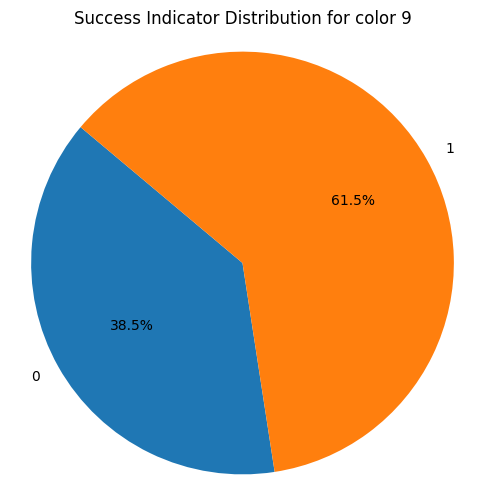

(912, 5)

In [78]:
comaprison_3 = pd.crosstab(df['color'], df['success_indicator'])

for color in comaprison_3.index:
    plt.figure(figsize=(6, 6))
    plt.pie(comaprison_3.loc[color], labels=comaprison_3.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Success Indicator Distribution for color {color}')
    plt.axis('equal')
    plt.show()

df[df['color'] == 0].shape # 812
df[(df['color'] == 0  ) & (df['success_indicator'] == 1)].shape

df[df['color'] == 1].shape # 1244
df[(df['color'] == 1  ) & (df['success_indicator'] == 1)].shape


**ANLYSIS ON SUCCESS INDICATOR**

In [57]:
df['success_indicator'].value_counts()




1    5185
0    2815
Name: success_indicator, dtype: int64

In [108]:
encoder = LabelEncoder()
df['success_indicator'] = encoder.fit_transform(df['success_indicator'])
df['success_indicator'].value_counts() # will encoded new target column WHERE TOP = 1 and FLOP =0


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 312.6 KB


In [60]:
df.shape

(8000, 5)

**EDA**

In [61]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df_balanced contains the balanced dataset
x = df.drop('success_indicator', axis=1)
y = df['success_indicator']0.837812

# Perform one-hot encoding on categorical features
categorical_cols = [col for col in x.columns if x[col].dtype == 'object']
if categorical_cols:
    x = pd.get_dummies(x, columns=categorical_cols)

# Step 2: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Train a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# Step 4: Evaluate the model
y_pred = logistic_regression.predict(x_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.798125

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68       571
           1       0.81      0.90      0.85      1029

    accuracy                           0.80      1600
   macro avg       0.79      0.76      0.77      1600
weighted avg       0.80      0.80      0.79      1600



In [80]:
df_balanced = pd.concat([x, y], axis=1)

In [81]:
print(df_balanced)

      category  main_promotion  color  stars  success_indicator
0            5               0      3    3.1                  0
1            1               1      7    1.5                  0
2            3               0      7    4.4                  1
3            2               1      1    3.1                  0
4            1               1      3    4.1                  1
...        ...             ...    ...    ...                ...
7995         4               0      1    3.9                  0
7996         3               3      3    3.5                  1
7997         4               1      9    4.0                  0
7998         0               1      1    2.6                  0
7999         3               2      1    3.9                  1

[8000 rows x 5 columns]


In [82]:
df_balanced.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.1,0
1,1,1,7,1.5,0
2,3,0,7,4.4,1
3,2,1,1,3.1,0
4,1,1,3,4.1,1


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df_balanced contains the balanced dataset
features = df.drop('success_indicator', axis=1)
target = df['success_indicator']

# Perform one-hot encoding on categorical features
categorical_cols = [col for col in features.columns if features[col].dtype == 'object']
if categorical_cols:
    features = pd.get_dummies(features, columns=categorical_cols)

# Step 2: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train a decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Step 4: Evaluate the model
y_pred = decision_tree.predict(x_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7975

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       571
           1       0.84      0.84      0.84      1029

    accuracy                           0.80      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.80      0.80      0.80      1600



In [127]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df_balanced contains the balanced dataset
X = df_balanced.drop('success_indicator', axis=1)
y = df_balanced['success_indicator']

# Perform one-hot encoding on categorical features
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
if categorical_cols:
    X = pd.get_dummies(X, columns=categorical_cols)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = svm_classifier.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81875

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72       571
           1       0.83      0.91      0.87      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.82      0.82      0.81      1600



In [126]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

# Assuming df_balanced contains the balanced dataset
features_1 = df.drop('success_indicator', axis=1)
labels = df['success_indicator']

# Perform one-hot encoding on categorical features
categorical_cols = [col for col in features_1.columns if features_1[col].dtype == 'object']
if categorical_cols:
    features = pd.get_dummies(features_1, columns=categorical_cols)

# Step 2: Split the dataset into training and testing sets
features_1_train, features_1_test, labels_train, labels_test = train_test_split(features_1, labels, test_size=0.2, random_state=42)

# Step 3: Define the neural network model
def create_neural_network():

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features_1_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 4: Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
  model.fit(features_1_train, labels_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the model
  test_loss, test_acc = model.evaluate(features_1_test, labels_test)
  print("Test Accuracy:", test_acc)

# Step 7: Predict on test data
  predictions = model.predict(features_1_test)
  predictions = (predictions > 0.5)  # Converting probabilities to binary values

# Print evaluation metrics
  print("Accuracy:", accuracy_score(labels_test, predictions))
  print("\nClassification Report:\n", classification_report(labels_test, predictions))
  return model


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df_balanced contains the balanced dataset
X = df_balanced.drop('success_indicator', axis=1)
y = df_balanced['success_indicator']

# Perform one-hot encoding on categorical features
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
if categorical_cols:
    X = pd.get_dummies(X, columns=categorical_cols)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = knn.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.83875

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       571
           1       0.85      0.91      0.88      1029

    accuracy                           0.84      1600
   macro avg       0.83      0.81      0.82      1600
weighted avg       0.84      0.84      0.84      1600



In [129]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df_balanced contains the balanced dataset
X = df_balanced.drop('success_indicator', axis=1)
y = df_balanced['success_indicator']

# Perform one-hot encoding on categorical features
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
if categorical_cols:
    X = pd.get_dummies(X, columns=categorical_cols)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = xgb_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.836875

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       571
           1       0.85      0.91      0.88      1029

    accuracy                           0.84      1600
   macro avg       0.83      0.81      0.82      1600
weighted avg       0.84      0.84      0.83      1600



Comparison of Model Performance

Logistic Regression: 0.793125 (0.013607)
Decision Tree: 0.789219 (0.014598)
Epoch 1/10
80/80 [==============================] - 1s 5ms/step - loss: 0.5680 - accuracy: 0.7000 - val_loss: 0.5495 - val_accuracy: 0.7156
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7457 - val_loss: 0.5267 - val_accuracy: 0.7289
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7586 - val_loss: 0.5120 - val_accuracy: 0.7477
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7705 - val_loss: 0.4979 - val_accuracy: 0.7641
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7775 - val_loss: 0.4861 - val_accuracy: 0.7852
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7854 - val_loss: 0.4939 - val_accuracy: 0.7711
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4740 - acc

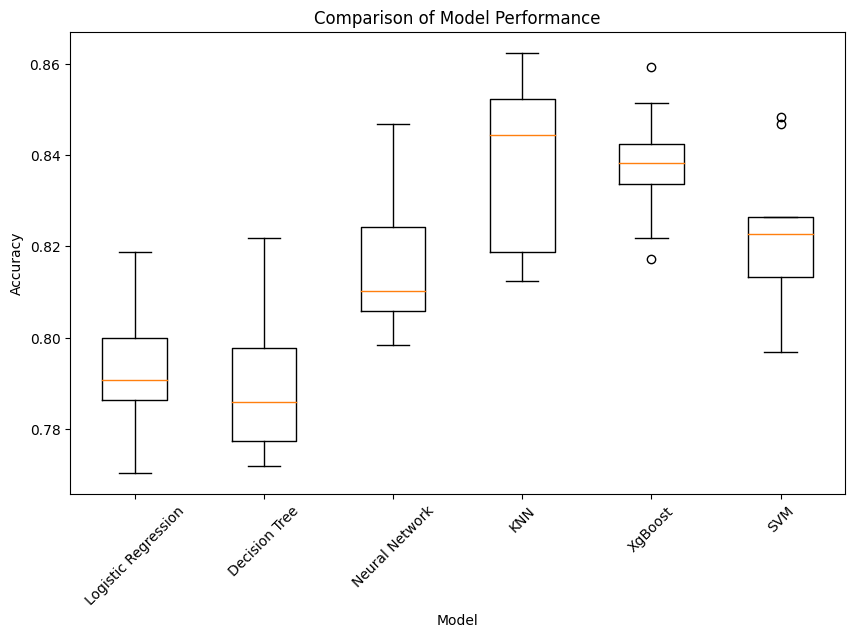

In [130]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.base import BaseEstimator, ClassifierMixin
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = create_neural_network()
        self.model.fit(X, y, epochs=10, batch_size=64, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Neural Network', KerasClassifierWrapper()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XgBoost',  XGBClassifier()))
models.append(('SVM',  SVC()))


# Step 5: Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Step 6: Create a boxplot to compare model performances
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Comparison of Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
()